In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('../input/fer2013/fer2013.csv')


In [3]:
width=48
height=48
DataPoints=data["pixels"].tolist()

In [4]:
print(len(DataPoints[2]))
print(len(DataPoints[0]))

8581
8287


In [5]:
X=[]
for i in DataPoints:
    x1 = [int(x) for x in i.split(' ')]
    x1=np.asarray(x1).reshape(width,height)
    X.append(x1.astype('float32'))
X = np.asarray(X)
print(X.shape)
X = np.expand_dims(X, -1)
print(X.shape)
    

(35887, 48, 48)
(35887, 48, 48, 1)


In [6]:
y = pd.get_dummies(data['emotion']).to_numpy()

print(y.shape)

(35887, 7)


In [7]:
np.save('fdataX', X)
np.save('flabels', y)
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [8]:
print("Preprocessing Done")
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of samples in dataset:"+str(len(X)))

Preprocessing Done
Number of Features: 48
Number of Labels: 7
Number of samples in dataset:35887


In [9]:
import sys,os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [10]:
labels=7
epochs=100
batch_size=64
# standarisation of x
x=X
x=x-np.mean(x,axis=0)
x/=np.std(x,axis=0)
print(x)
# values in -1 to 1
print(x.shape)
print(X.shape)

[[[[-0.60648495]
   [-0.4562006 ]
   [-0.40110716]
   ...
   [-0.76583207]
   [-0.901028  ]
   [-0.9487176 ]]

  [[-0.6577653 ]
   [-0.67946464]
   [-0.6925164 ]
   ...
   [-0.7071234 ]
   [-0.7820999 ]
   [-0.90432435]]

  [[-0.8304327 ]
   [-0.8934978 ]
   [-0.734429  ]
   ...
   [-0.7875835 ]
   [-0.72186905]
   [-0.85738075]]

  ...

  [[-0.33435795]
   [-0.6523918 ]
   [-0.937419  ]
   ...
   [-0.526588  ]
   [-0.7380636 ]
   [-0.9091638 ]]

  [[-0.51195467]
   [-0.43779588]
   [-0.46622527]
   ...
   [-0.10086355]
   [-0.5583586 ]
   [-0.870607  ]]

  [[-0.51134855]
   [-0.5642179 ]
   [-0.3995129 ]
   ...
   [-0.08714531]
   [-0.05788792]
   [-0.41197315]]]


 [[[ 0.37588486]
   [ 0.40796128]
   [ 0.41422534]
   ...
   [ 0.20136307]
   [ 0.29842654]
   [ 0.01435708]]

  [[ 0.39234453]
   [ 0.41382545]
   [ 0.457275  ]
   ...
   [ 0.12816645]
   [ 0.32547316]
   [ 0.23515376]]

  [[ 0.41038084]
   [ 0.45646253]
   [ 0.56443846]
   ...
   [-0.02222032]
   [ 0.11624809]
   [ 0.3595

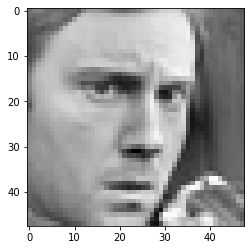

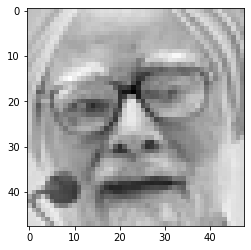

In [11]:
for x1 in range(2):
   plt.figure(x1)
   plt.imshow(x[x1], interpolation='none', cmap='gray')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
np.save('X_test',X_test)
np.save('y_test',y_test)

# **CNN MODEL**

conv2d since 2d kernel used in convolution

In [13]:
model=Sequential()
n=64  
# no of neurons

model.add(Conv2D(n,kernel_size=(3,3),activation='relu',input_shape=(width, height, 1)))
model.add(Conv2D(n,kernel_size=(3,3),activation='relu',padding='same'))
# Same padding means the size of output feature-maps are the same as the input feature-maps
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*n,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(2*2*2*n, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2*2*n, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2*n, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(labels,activation='softmax'))

model.summary()

# There are mainly two types of non-trainable weights:

# The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.
# The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [14]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [15]:
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          shuffle=True)

Epoch 1/100
505/505 [==============================] - 17s 25ms/step - loss: 2.1634 - accuracy: 0.2028
Epoch 2/100
505/505 [==============================] - 12s 24ms/step - loss: 1.7729 - accuracy: 0.2622
Epoch 3/100
505/505 [==============================] - 12s 24ms/step - loss: 1.6302 - accuracy: 0.3486
Epoch 4/100
505/505 [==============================] - 12s 24ms/step - loss: 1.5014 - accuracy: 0.4096
Epoch 5/100
505/505 [==============================] - 12s 24ms/step - loss: 1.4120 - accuracy: 0.4492
Epoch 6/100
505/505 [==============================] - 12s 24ms/step - loss: 1.3585 - accuracy: 0.4810
Epoch 7/100
505/505 [==============================] - 12s 24ms/step - loss: 1.3073 - accuracy: 0.5118
Epoch 8/100
505/505 [==============================] - 12s 24ms/step - loss: 1.2615 - accuracy: 0.5263
Epoch 9/100
505/505 [==============================] - 12s 25ms/step - loss: 1.2411 - accuracy: 0.5344
Epoch 10/100
505/505 [==============================] - 12s 24ms/step - l

505/505 [==============================] - 12s 24ms/step - loss: 0.3154 - accuracy: 0.8964
Epoch 80/100
505/505 [==============================] - 12s 24ms/step - loss: 0.3187 - accuracy: 0.8973
Epoch 81/100
505/505 [==============================] - 12s 24ms/step - loss: 0.3081 - accuracy: 0.8953
Epoch 82/100
505/505 [==============================] - 12s 24ms/step - loss: 0.3015 - accuracy: 0.9020
Epoch 83/100
505/505 [==============================] - 12s 24ms/step - loss: 0.3133 - accuracy: 0.8964
Epoch 84/100
505/505 [==============================] - 12s 24ms/step - loss: 0.3032 - accuracy: 0.9000
Epoch 85/100
505/505 [==============================] - 12s 24ms/step - loss: 0.2890 - accuracy: 0.9089
Epoch 86/100
505/505 [==============================] - 12s 24ms/step - loss: 0.2868 - accuracy: 0.9053
Epoch 87/100
505/505 [==============================] - 12s 24ms/step - loss: 0.2933 - accuracy: 0.9051
Epoch 88/100
505/505 [==============================] - 12s 24ms/step - loss:

**100 epochs
batch size:64**

In [16]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
y_predicted=model.predict(X_test)
print(y_predicted.shape)

(3589, 7)


In [18]:
import joblib
yh = y_predicted.tolist()
yt = y_test.tolist()
count = 0
predy=[]
truey=[]
for i in range(len(y_test)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y_test))*100
print(acc)
np.save('truey', truey)
np.save('predy', predy)

joblib.dump(model, "data_transformer.joblib")
model.save('model.h5')

65.42212315408192


> **67% accurate on test data**

(1536, 1200, 3)
(1536, 1200)


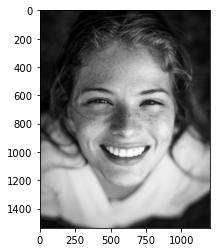

In [59]:
from PIL import Image 
import cv2
from urllib.request import urlopen
from PIL import Image




img = cv2.imread("../input/test-happy/t2.jpg")

print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img,cmap="gray")  
plt.show() 

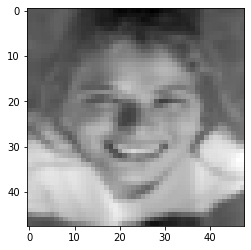

In [60]:
from skimage.transform import resize
from skimage import data
image = np.array(img)
image=resize(image, (48, 48,1))
x12=image
x12=x12-np.mean(x12,axis=0)
x12/=np.std(x12,axis=0)
# print(x)
plt.imshow(x12,cmap="gray")  
plt.show() 

In [61]:
arr=model.predict(np.array([image]))

c=0
index=0
max=0.00
for x in arr[0]:
    if x > max:
        max=x
        index=c
    c+=1
    
print(index)
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

3


**saving model for future usage**

In [68]:
import os
os.chdir(r'/kaggle/working')
from IPython.display import FileLink 
FileLink(r'model.h5')

/kaggle/working/model.h5